In [1]:
from sklearn.model_selection import train_test_split

import os
import pandas as pd

# classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

import sys
sys.path.insert(0, '../')

from TextLabeller import *

%matplotlib inline

In [2]:
from plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [3]:
def classify(x, y, train_test_ratio):

    x_train, test, train_labels, test_labels = train_test_split(x, y, test_size = train_test_ratio)

    print('input dimensions:', len(x), '|', 'output dimensions:', len(y))
    print('x_train dimensions:', len(x_train), '|', 'y_train dimensions:', len(train_labels))
    print('x_test dimensions:', len(test), '|', 'y_test dimensions:', len(test_labels)) 

    # Initialize classifier
    rfc = RandomForestClassifier()
#     from sklearn.naive_bayes import GaussianNB
#     rfc = GaussianNB()


    # Train classifier
    model = rfc.fit(x_train, train_labels)

    # Make predictions
    y_preds = rfc.predict(test)

    # Evaluate model
    print(classification_report(test_labels, y_preds))
    print(accuracy_score(test_labels, y_preds))
    print(confusion_matrix(test_labels, y_preds))
    
    return rfc, test_labels, y_preds


# ROC Curve
def plot_roc_curve(test_labels, y_preds):
    fpr, tpr, threshold = roc_curve(test_labels, y_preds)
    roc_auc = auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [4]:
def normalize(distances):
    """
    """
    min_val, max_val = min(distances), max(distances)
    return [(val - 0) / (max_val - 0) for val in distances]

from utils import read_list, normal_distribution, get_scatter_plot, inverse_distances, normed_dists_to_sims

def stacked_hist(data, name):
    n_bins=100
    colors = ["Real", "Fake"]
    plt.hist(data, n_bins, density=1, histtype='bar', stacked=True, label=colors)
    plt.legend(loc="upper right")
    plt.title(name)
    plt.show()
    
def _stacked_hist(data):
    n_bins=100
    colors = ["Real", "Fake"]
    plt.hist(data, n_bins, density=1, histtype='bar', stacked=True, label=colors)
    plt.legend(loc="upper right")
#     plt.title(name)
    plt.show()
    
def combine_metrics_list(list1, list2, list3):
    combined_list = [list1]
    combined_list.append(list2)
    combined_list.append(list3)
    
    return combined_list

def combine_real_fake(real_list, fake_list):
    combined_list = [real_list]
    combined_list.append(fake_list)
    return combined_list

10500
10500


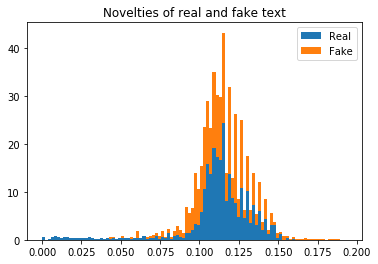

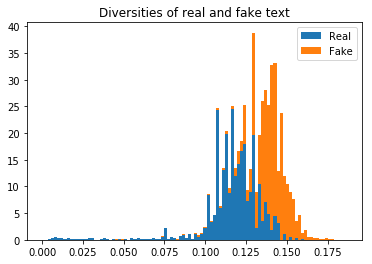

,text,novelty,diversity,label
11105,long minister donald trump was alleged the com...,0.110599,0.121212,0
11106,most guys saw anything to see things we probab...,0.113402,0.137143,0
11107,but when a fence didn ' t have a reason time o...,0.142349,0.154639,0
11108,only for transfer powers to government data wh...,0.115385,0.140704,0
11109,`` we value to happens it ' s extremely happy ...,0.113636,0.140704,0
11110,that ' s another easy way for kids who has a b...,0.098837,0.128834,0
11111,`` many people that is what we came back out b...,0.135135,0.154982,0
11112,"`` it ' s financial advice into one , so we ' ...",0.127413,0.143519,0
11113,`` the needed way to round up all un and for i...,0.146667,0.154639,0
11115,her plans to respond these goals has been a fl...,0.108597,0.135678,0


In [86]:
METRIC = "levenshtein"

labelled_real=f'{METRIC}_labelled_real_text_copy.csv'
labelled_fake=f'{METRIC}_labelled_fake_text_copy.csv'

# labelled_real=f'labelled_real_metrics_{METRIC}.csv'
# labelled_fake=f'labelled_fake_metrics_{METRIC}.csv'

real_data = pd.read_csv(labelled_real)
fake_data = pd.read_csv(labelled_fake)

real_data['text'] = real_data['text'].astype('str')
mask = (real_data['text'].str.len() >= 20)
real_data = real_data[mask]

fake_data['text'] = fake_data['text'].astype('str')
mask = (fake_data['text'].str.len() >= 20)
fake_data = fake_data[mask]

combined_data = real_data.append(fake_data)

print(len(fake_data))
print(len(real_data))

y = combined_data['label'].values

csvjac_novs = combine_real_fake(real_data['novelty'], fake_data['novelty'])
stacked_hist(csvjac_novs, "Novelties of real and fake text")

csvjac_divs = combine_real_fake(real_data['diversity'], fake_data['diversity'])
stacked_hist(csvjac_divs, "Diversities of real and fake text")

combined_data.tail(10)



In [6]:
def get_scatter_plot(data_x, data_y, data_x1, data_y1):
    """ Scatter plot of novelties vs diversities. 
    """
    plt.scatter(data_x, data_y, color='darkorange', marker='+', label='Synthetic text', alpha=1)
    plt.scatter(data_x1, data_y1, color='blue', marker='o', label='Real text', alpha=0.1)

    plt.title('{} vs {} of real and fake sentences'.format("Novelties", "Diversities"))
    plt.xlabel('Diversity of sentence')
#     plt.xlim(0, 1)
#     plt.ylim(0, 1)
    plt.ylabel('Novelty of sentence')
    plt.legend(loc='upper left')
    plt.show()

In [7]:
lev_normed_real_diversities = (real_data['diversity'].values)
lev_normed_real_novelties = (real_data['novelty'].values)
lev_normed_fake_diversities = (fake_data['diversity'].values)
lev_normed_fake_novelties = (fake_data['novelty'].values)

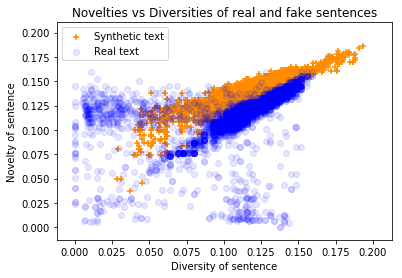

In [8]:
get_scatter_plot(lev_normed_fake_novelties, lev_normed_fake_diversities, lev_normed_real_novelties, lev_normed_real_diversities)

## Classify using both novelty and diversity

input dimensions: 20855 | output dimensions: 20855
x_train dimensions: 18769 | y_train dimensions: 18769
x_test dimensions: 2086 | y_test dimensions: 2086
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1047
           1       0.99      0.99      0.99      1039

   micro avg       0.99      0.99      0.99      2086
   macro avg       0.99      0.99      0.99      2086
weighted avg       0.99      0.99      0.99      2086

0.9894534995206136
[[1038    9]
 [  13 1026]]


/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


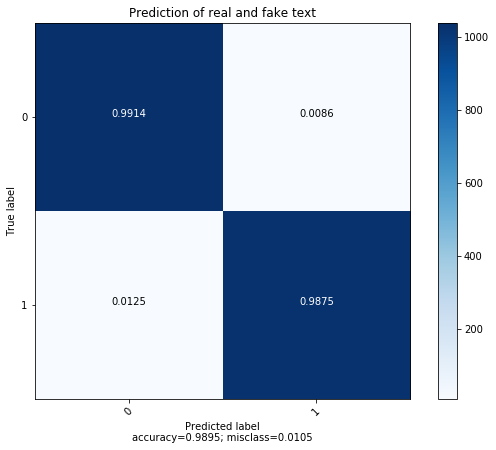

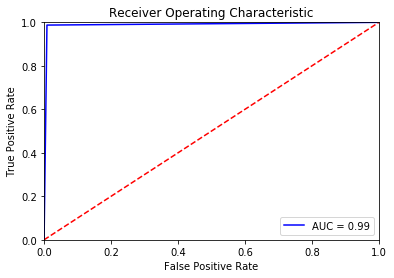

In [9]:
novs = combined_data['novelty'].values
divs = combined_data['diversity'].values

novs_divs_x = list()
for ix, nov in enumerate(novs):
    novs_divs_x.append([nov, divs[ix]])

rfc, test_labels, y_preds = classify(novs_divs_x, y, train_test_ratio=0.1)

plot_confusion_matrix(cm           = confusion_matrix(test_labels, y_preds), # confusion matrix created by sklearn.metrics.confusion_matrix
                      normalize    = True,                # show proportions
                      target_names = [0, 1],       # list of names of the classes
                      title        = 'Prediction of real and fake text') # title of graph
    
plot_roc_curve(test_labels=test_labels, y_preds=y_preds)

from sklearn.tree import export_graphviz

# export_graphviz(rfc.estimators_[5],
#                 feature_names=['novelty', 'diversity'],
#                 class_names=['Fake','Real'],
#                 filled=True, precision=True, proportion=False,
#                 rounded=True)

# from subprocess import call
# call(['dot', '-Tpng', 'tree.dot', '-o', 'nov_div.png', '-Gdpi=600'])

# from IPython.display import Image
# Image(filename='nov_div.png')

## Classify using only novelty

input dimensions: 20855 | output dimensions: 20855
x_train dimensions: 18769 | y_train dimensions: 18769
x_test dimensions: 2086 | y_test dimensions: 2086
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      1051
           1       0.84      0.90      0.87      1035

   micro avg       0.87      0.87      0.87      2086
   macro avg       0.87      0.87      0.87      2086
weighted avg       0.87      0.87      0.87      2086

0.8676893576222435
[[875 176]
 [100 935]]


/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


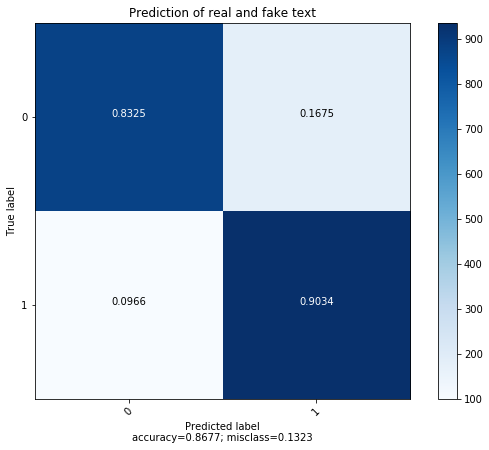

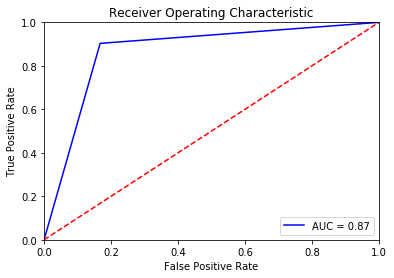

In [10]:
novs = combined_data['novelty'].values

novs_x = list()
for ix, nov in enumerate(novs):
    novs_x.append([nov])

rfc, test_labels, y_preds = classify(novs_x, y, train_test_ratio=0.1)

plot_confusion_matrix(cm           = confusion_matrix(test_labels, y_preds), # confusion matrix created by sklearn.metrics.confusion_matrix
                      normalize    = True,                # show proportions
                      target_names = [0, 1],       # list of names of the classes
                      title        = 'Prediction of real and fake text') # title of graph
    
plot_roc_curve(test_labels=test_labels, y_preds=y_preds)

# export_graphviz(rfc.estimators_[5],
#                 feature_names=['diversity'],
#                 class_names=['Fake','Real'],
#                 filled=True, precision=True, proportion=False,
#                 rounded=True)

# from subprocess import call
# call(['dot', '-Tpng', 'tree.dot', '-o', 'nov.png', '-Gdpi=600'])

# from IPython.display import Image
# Image(filename='nov.png')

## Classify using only diversity

input dimensions: 20855 | output dimensions: 20855
x_train dimensions: 18769 | y_train dimensions: 18769
x_test dimensions: 2086 | y_test dimensions: 2086
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1049
           1       0.95      0.96      0.96      1037

   micro avg       0.96      0.96      0.96      2086
   macro avg       0.96      0.96      0.96      2086
weighted avg       0.96      0.96      0.96      2086

0.9568552253116012
[[997  52]
 [ 38 999]]


/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


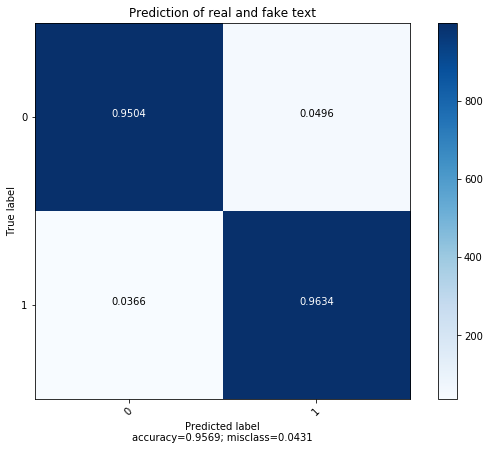

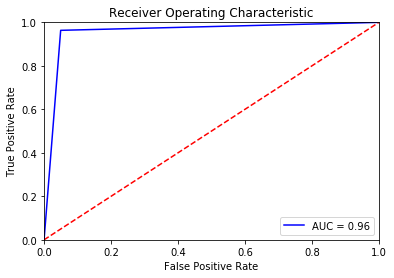

In [11]:
divs = combined_data['diversity'].values

divs_x = list()
for ix, div in enumerate(divs):
    divs_x.append([div])

rfc, test_labels, y_preds = classify(divs_x, y, train_test_ratio=0.1)

plot_confusion_matrix(cm           = confusion_matrix(test_labels, y_preds), # confusion matrix created by sklearn.metrics.confusion_matrix
                      normalize    = True,                # show proportions
                      target_names = [0, 1],       # list of names of the classes
                      title        = 'Prediction of real and fake text') # title of graph
    
plot_roc_curve(test_labels=test_labels, y_preds=y_preds)

# export_graphviz(rfc.estimators_[5],
#                 feature_names=['diversity'],
#                 class_names=['Fake','Real'],
#                 filled=True, precision=True, proportion=False,
#                 rounded=True)

# from subprocess import call
# call(['dot', '-Tpng', 'tree.dot', '-o', 'div.png', '-Gdpi=600'])

# from IPython.display import Image
# Image(filename='div.png')

## Classify with both novelty and diversity: test with unseen data (TBD)

In [12]:
# novs = combined_data['novelty'].values
# divs = combined_data['diversity'].values

# x = list()
# for ix, nov in enumerate(novs):
#     x.append([nov, divs[ix]])
    
# # unlabelled_real='unlabelled_real_text.csv' # not really unlabelled, just missing novelty and diversity
# # unlabelled_fake='unlabelled_fake_text.csv' # same here

# # _real_data = pd.read_csv(unlabelled_real)
# # _fake_data = pd.read_csv(unlabelled_real)

# # _combined_data = _real_data.append(_fake_data)

# # x_train, test, train_labels, test_labels = x,  , y, _combined_data['label'].values

# x_train, test, train_labels, test_labels = train_test_split(x, y, test_size = 0.10)

# print('input dimensions:', len(x), '|', 'output dimensions:', len(y))
# print('x_train dimensions:', len(x_train), '|', 'y_train dimensions:', len(train_labels))
# print('x_test dimensions:', len(test), '|', 'y_test dimensions:', len(test_labels)) 

# import xgboost as xgb
# model = xgb.XGBClassifier(max_depth=50, n_estimators=80, learning_rate=0.1, colsample_bytree=.7, gamma=0, 
#                           reg_alpha=4, objective='binary:logistic', eta=0.3, silent=1, subsample=0.8)
# model.fit(x_train, train_labels) 


# # # Initialize classifier
# # rfc = RandomForestClassifier()

# # # Train classifier
# # model = rfc.fit(x_train, train_labels)

# # Make predictions
# preds = rfc.predict(test)

# # Evaluate model
# from sklearn.metrics import classification_report, accuracy_score
# print(classification_report(test_labels, preds))
# print(accuracy_score(test_labels, preds))

[[0.1164021164021164], [0.11111111111111116], [0.1232876712328767], [0.11059907834101383], [0.106951871657754], [0.13306451612903225], [0.10285714285714287], [0.08609271523178808], [0.013605442176870748], [0.10152284263959388]] [1 0 1 1 1 1 1 0 1 0]
[0.46239379 0.43416774 0.43095669 ... 0.42576223 0.46686217 0.57799581]
[[0.13684210526315788], [0.12429378531073447], [0.1073170731707317], [0.11219512195121953], [0.13725490196078433], [0.12941176470588234], [0.12916666666666668], [0.13714285714285712], [0.1435185185185185], [0.12916666666666668]] [0 1 1 1 1 0 1 0 0 1]
[0.43202341 0.54285551 0.16211059 ... 0.24972068 0.31436558 0.41183803]
[[0.12741312741312738, 0.1461187214611872], [0.11788617886178865, 0.13888888888888884], [0.12236286919831225, 0.12916666666666668], [0.11538461538461542, 0.1347150259067358], [0.13488372093023254, 0.12916666666666668], [0.0967741935483871, 0.10377358490566037], [0.11818181818181815, 0.14210526315789473], [0.0, 0.04], [0.1131221719457014, 0.1454545454545

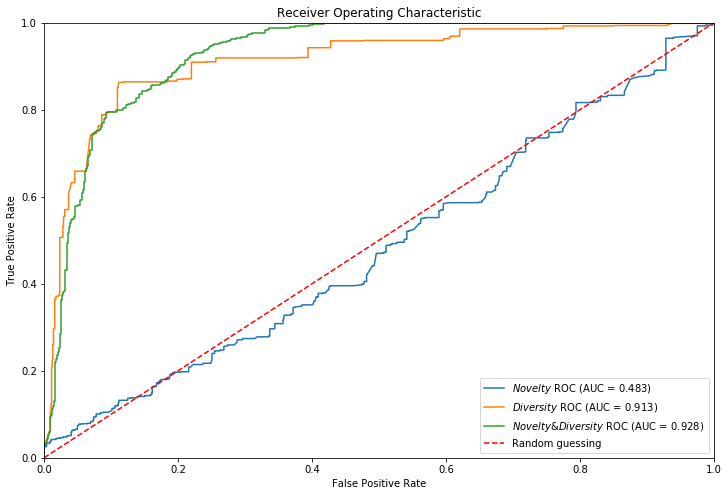

In [13]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

model = GaussianNB()

fig = plt.figure()

# Add the models to the list that you want to view on the ROC plot
metrics = [
{
    'label': '$Novelty$',
    'model': model,
    'metric': novs_x
},
{
    'label': '$Diversity$',
    'model': model,
    'metric': divs_x
},
    {
    'label': '$Novelty & Diversity$',
    'model': model,
    'metric': novs_divs_x
},
]

# print(metrics[0])

# Below for loop iterates through your models list
for m in metrics:
    model = GaussianNB() # select the model
    x = m['metric']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
    print(x_train[:10], y_train[:10])
    model.fit(x_train, y_train) # train the model
    y_preds=model.predict_proba(x_test)[:,1] # predict the test data
    
    print(y_preds)

    fpr, tpr, _ = roc_curve(y_test, y_preds)
#     print(fpr, tpr)
    roc_auc = auc(fpr, tpr)
#     print(roc_auc)
    plt.plot(fpr, tpr, label='%s ROC (AUC = %0.3f)' % (m['label'], roc_auc))
    
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--', label='Random guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

fig.set_figheight(8)
fig.set_figwidth(12)
plt.show()   # Display



/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


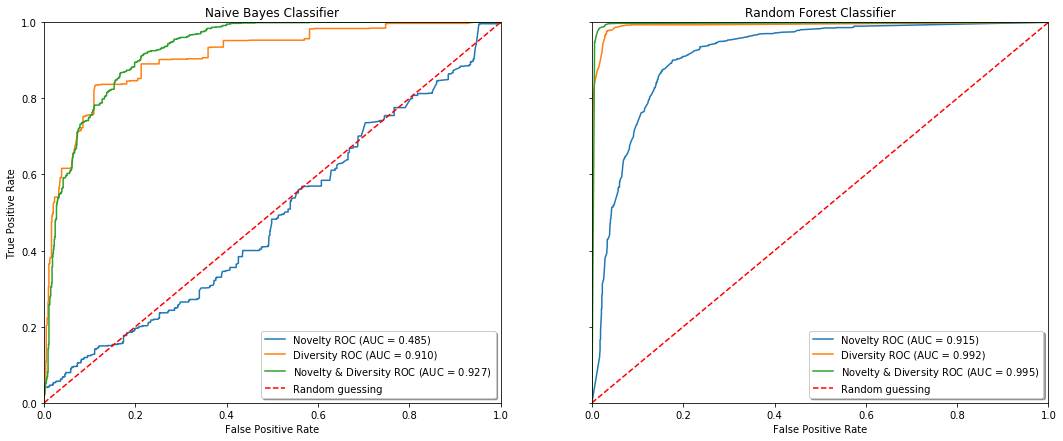

In [14]:
from sklearn import metrics
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)

# Add the models to the list that you want to view on the ROC plot
metrics = [
{
    'label': 'Novelty',
    'model': model,
    'metric': novs_x
},
{
    'label': 'Diversity',
    'model': model,
    'metric': divs_x
},
    {
    'label': 'Novelty $&$ Diversity',
    'model': model,
    'metric': novs_divs_x
},
]


# Below for loop iterates through your models list
for m in metrics:
    model = GaussianNB() # select the model
    x = m['metric']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
    model.fit(x_train, y_train) # train the model
    y_preds=model.predict_proba(x_test)[:,1] # predict the test data

    fpr, tpr, _ = roc_curve(y_test, y_preds)
    roc_auc = auc(fpr, tpr)
    ax1.plot(fpr, tpr, label='{} ROC (AUC = {:0.3f})'.format(m['label'], roc_auc))

            
ax1.plot([0, 1], [0, 1],'r--', label='Random guessing')
ax1.legend(loc="lower right", shadow=True, fancybox=True)
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.0])
ax1.set_title("Naive Bayes Classifier")
            
for m in metrics:
    model = RandomForestClassifier() # select the model
    x = m['metric']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
    model.fit(x_train, y_train) # train the model
    y_preds=model.predict_proba(x_test)[:,1] # predict the test data

    fpr, tpr, _ = roc_curve(y_test, y_preds)
    roc_auc = auc(fpr, tpr)
    ax2.plot(fpr, tpr, label='{} ROC (AUC = {:0.3f})'.format(m['label'], roc_auc))


ax2.plot([0, 1], [0, 1],'r--', label='Random guessing')
# ax.plot([0, 1], [0, 1],'r--', label='Random guessing')
ax2.legend(loc="lower right", shadow=True, fancybox=True)
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.0])               
ax2.set_title("Random Forest Classifier")

            
for ax in (ax1, ax2):
    ax.set(ylabel='True Positive Rate', xlabel='False Positive Rate')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in (ax1, ax2):
    ax.label_outer()

fig.set_figheight(7)
fig.set_figwidth(18)
plt.show()   # Display



mean acc: 0.4907318632150847 +- 0.008359198856556296
mean acc: 0.8381271971875998 +- 0.007165787370732028
mean acc: 0.8284595717481623 +- 0.0024939333332846775


/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


mean acc: 0.8652924256951103 +- 0.004049591609431885


/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


mean acc: 0.964046021093001 +- 0.0016118085385384258


/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


mean acc: 0.985538510706296 +- 0.0012054991570065582


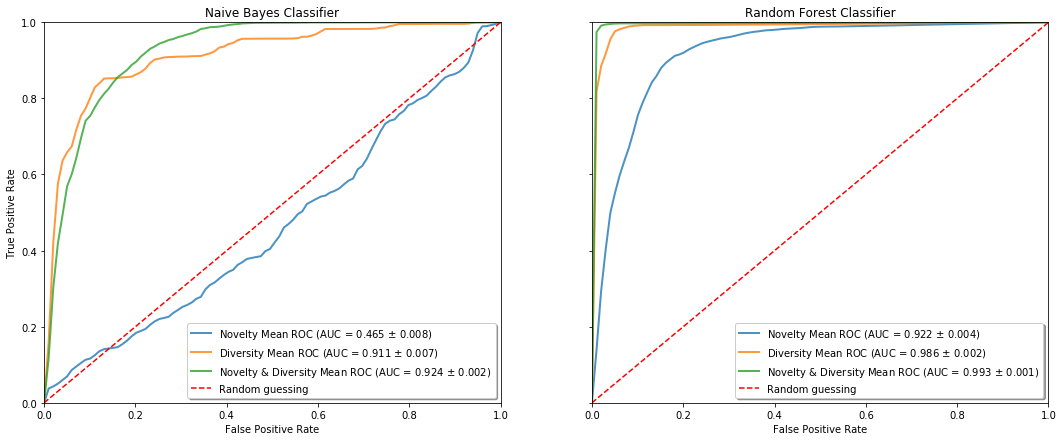

In [15]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.model_selection import StratifiedKFold

fig, (ax1, ax2) = plt.subplots(1, 2)

# Add the models to the list that you want to view on the ROC plot
metrics = [
{
    'label': 'Novelty',
    'model': None,
    'metric': novs_x
},
{
    'label': 'Diversity',
    'model': None,
    'metric': divs_x
},
    {
    'label': 'Novelty $&$ Diversity',
    'model': None,
    'metric': novs_divs_x
},
]

seed=7

# Below for loop iterates through your models list
for m in metrics:
    model = GaussianNB() # select the model
    x = m['metric']
    
    cv = StratifiedKFold(n_splits=6, random_state=seed)

    accs = []
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    X=x
    
    i = 0
    for train, test in cv.split(x, y):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
        probas_ = model.fit(x_train, y_train).predict_proba(x_test)
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        
        
        conf_mat = confusion_matrix(model.predict(x_test), y_test)
        acc = np.sum(conf_mat.diagonal()) / np.sum(conf_mat)
        accs.append(acc)
        
#         plt.plot(fpr, tpr, lw=1, alpha=0.3,
#                  label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
#     plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
#              label='Chance', alpha=.8)

    mean_acc = np.mean(accs, axis=0)
    std_acc = np.std(aucs)
    
    print("mean acc: {} +- {}".format(mean_acc, std_acc))

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax1.plot(mean_fpr, mean_tpr,
             label=r'%s Mean ROC (AUC = %0.3f $\pm$ %0.3f)' % (m['label'], mean_auc, std_auc),
             lw=2, alpha=.8)

#     std_tpr = np.std(tprs, axis=0)
#     tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
#     tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#     plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
#                      label=r'$\pm$ 1 std. dev.')
    
    
#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
#     model.fit(x_train, y_train) # train the model
#     y_preds=model.predict_proba(x_test)[:,1] # predict the test data

#     fpr, tpr, _ = roc_curve(y_test, y_preds)
#     roc_auc = auc(fpr, tpr)
#     ax1.plot(fpr, tpr, label='{} ROC (AUC = {:0.3f})'.format(m['label'], roc_auc))

            
ax1.plot([0, 1], [0, 1],'r--', label='Random guessing')
ax1.legend(loc="lower right", shadow=True, fancybox=True)
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.0])
ax1.set_title("Naive Bayes Classifier")
            
for m in metrics:
    model = RandomForestClassifier() # select the model
    x = m['metric']
    
    cv = StratifiedKFold(n_splits=6)

    accs = []
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    X=x
    
    i = 0
    for train, test in cv.split(x, y):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
        probas_ = model.fit(x_train, y_train).predict_proba(x_test)
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        
        conf_mat = confusion_matrix(model.predict(x_test), y_test)
        acc = np.sum(conf_mat.diagonal()) / np.sum(conf_mat)
        accs.append(acc)
#         plt.plot(fpr, tpr, lw=1, alpha=0.3,
#                  label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
#     plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
#              label='Chance', alpha=.8)


    mean_acc = np.mean(accs, axis=0)
    std_acc = np.std(aucs)
    
    print("mean acc: {} +- {}".format(mean_acc, std_acc))
    
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax2.plot(mean_fpr, mean_tpr,
             label=r'%s Mean ROC (AUC = %0.3f $\pm$ %0.3f)' % (m['label'], mean_auc, std_auc),
             lw=2, alpha=.8)


ax2.plot([0, 1], [0, 1],'r--', label='Random guessing')
# ax.plot([0, 1], [0, 1],'r--', label='Random guessing')
ax2.legend(loc="lower right", shadow=True, fancybox=True)
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.0])               
ax2.set_title("Random Forest Classifier")

            
for ax in (ax1, ax2):
    ax.set(ylabel='True Positive Rate', xlabel='False Positive Rate')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in (ax1, ax2):
    ax.label_outer()

fig.set_figheight(7)
fig.set_figwidth(18)
plt.show()   # Display


Automatically created module for IPython interactive environment


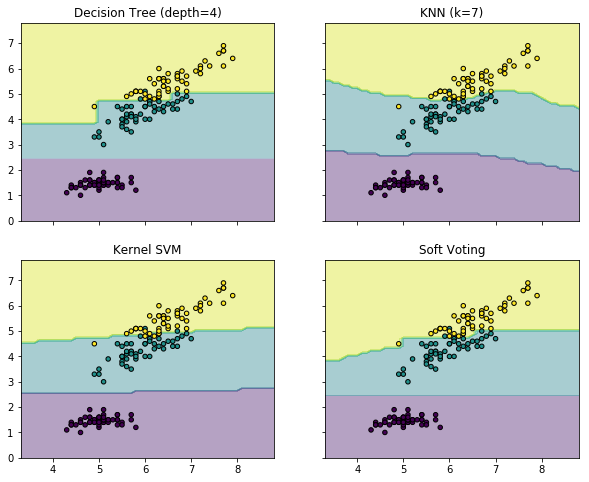

In [16]:
print(__doc__)

from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(gamma=.1, kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2),
                                    ('svc', clf3)],
                        voting='soft', weights=[2, 1, 2])

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['Decision Tree (depth=4)', 'KNN (k=7)',
                         'Kernel SVM', 'Soft Voting']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

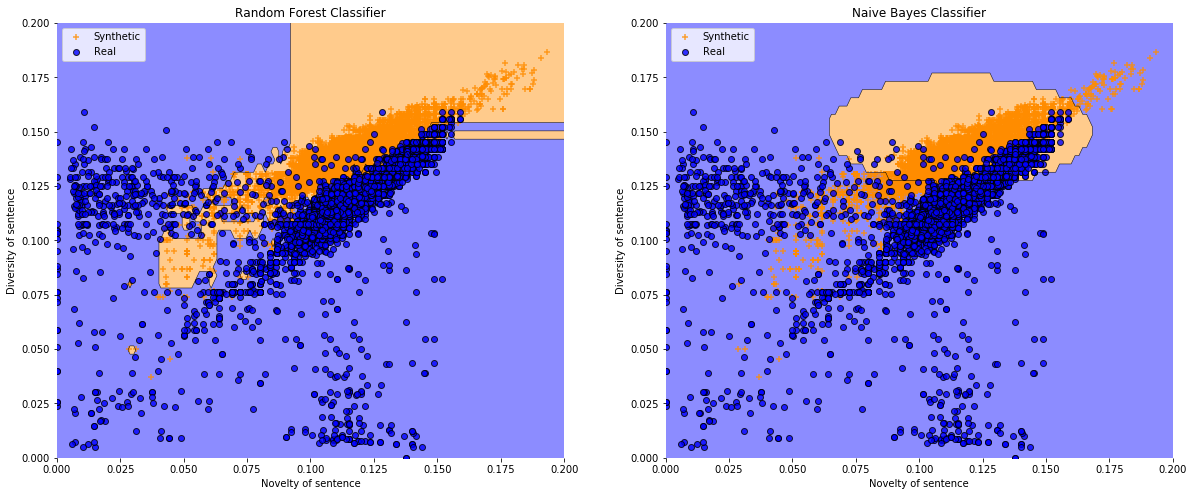

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions

# Initializing Classifiers
clf2 = RandomForestClassifier(random_state=0, n_estimators=100)
clf3 = GaussianNB()

# Loading some example data
X = np.array(novs_divs_x)
y = np.array(combined_data['label'].values)

# Plotting Decision Regions
gs = gridspec.GridSpec(1, 2)
fig = plt.figure(figsize=(20, 8))

labels = [
          'Random Forest Classifier',
          'Naive Bayes Classifier'
          ]

for clf, lab, grd in zip([clf2, clf3],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[ grd[1]])
    fig = plot_decision_regions(X=X, y=y,
                                clf=clf, legend=2, markers='+o', colors='darkorange,blue')
    plt.xlim(0,0.2)
    plt.ylim(0,0.2)
    plt.xlabel('Novelty of sentence')
    plt.ylabel('Diversity of sentence')
    plt.title(lab)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, 
          ['Synthetic', 'Real'], )
#            framealpha=0.3, scatterpoints=1)

plt.show()

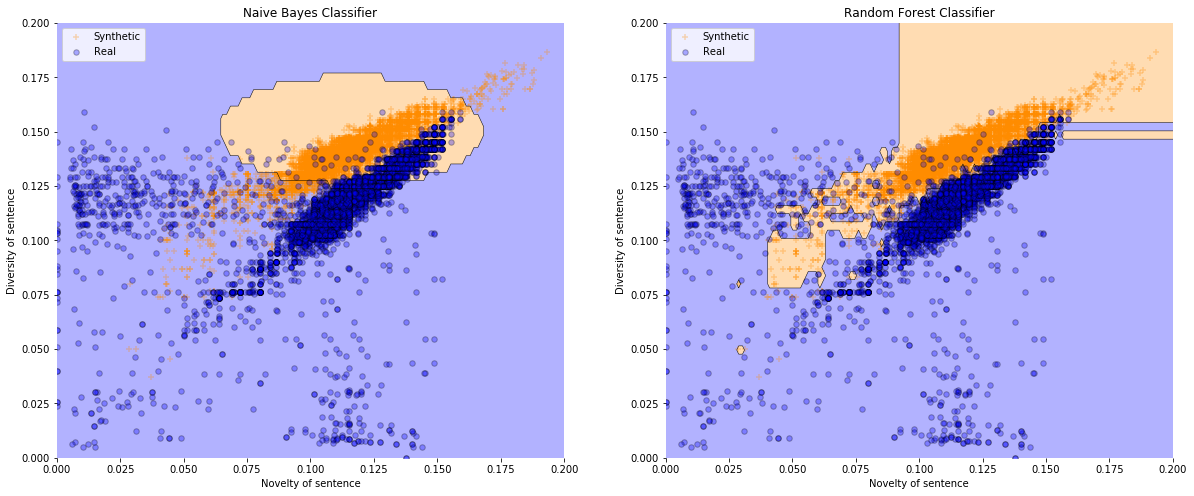

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions

# Initializing Classifiers
clf3 = RandomForestClassifier(random_state=0, n_estimators=100)
clf2 = GaussianNB()

# Loading some example data
X = np.array(novs_divs_x)
y = np.array(combined_data['label'].values)

# Plotting Decision Regions
gs = gridspec.GridSpec(1, 2)
fig = plt.figure(figsize=(20, 8))

labels = [
            'Naive Bayes Classifier',
          'Random Forest Classifier',
          
          ]

for clf, lab, grd in zip([clf2, clf3],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[ grd[1]])
    
    scatter_kwargs = {'s': 30, 'edgecolor': 'black', 'alpha': 0.3}
    contourf_kwargs = {'alpha': 0.3}
    scatter_highlight_kwargs = {'s': 50, 'label': 'Test data', 'alpha': 0.1}
    
    fig = plot_decision_regions(X=X, y=y,
                                clf=clf, legend=2, markers='+o', colors='darkorange,blue',scatter_kwargs=scatter_kwargs,
                                  contourf_kwargs=contourf_kwargs,scatter_highlight_kwargs=scatter_highlight_kwargs)
    plt.xlim(0,0.2)
    plt.ylim(0,0.2)
    plt.xlabel('Novelty of sentence')
    plt.ylabel('Diversity of sentence')
    plt.title(lab)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, 
          ['Synthetic', 'Real'], )
#            framealpha=0.3, scatterpoints=1)

plt.show()

mean acc: 0.49729016772248846 +- 0.018191972524874672
mean acc: 0.8345236064888887 +- 0.007294815863395822
mean acc: 0.8244542845533529 +- 0.007332352187202873


/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


mean acc: 0.866314880691929 +- 0.006811671049264413


/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


mean acc: 0.962838264603118 +- 0.0018978870909436489


/Users/dc/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


mean acc: 0.986094115483273 +- 0.002000238742705394


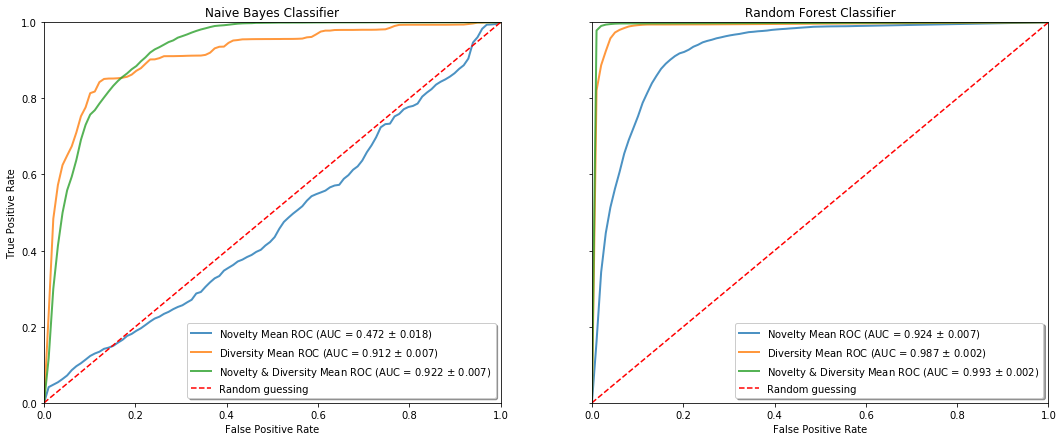

In [19]:
# Stratified 10-fold cross validation

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.model_selection import StratifiedKFold

fig, (ax1, ax2) = plt.subplots(1, 2)

# Add the models to the list that you want to view on the ROC plot
metrics = [
{
    'label': 'Novelty',
    'model': None,
    'metric': novs_x
},
{
    'label': 'Diversity',
    'model': None,
    'metric': divs_x
},
    {
    'label': 'Novelty $&$ Diversity',
    'model': None,
    'metric': novs_divs_x
},
]


seed=7

cv = StratifiedKFold(n_splits=10, random_state=seed)


# Below for loop iterates through your models list
for m in metrics:
    model = GaussianNB() # select the model
    x = np.array(m['metric'])
    

    accs = []
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    
    i=0
    for train, test in (cv.split(x,y)):
        x_train = x[train]
        x_test = x[test]
        y_train = y[train]
        y_test = y[test]
        probas_ = model.fit(x_train, y_train).predict_proba(x_test)
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        
        conf_mat = confusion_matrix(model.predict(x_test), y_test)
        acc = np.sum(conf_mat.diagonal()) / np.sum(conf_mat)
        accs.append(acc)
        
        
        conf_mat = confusion_matrix(model.predict(x_test), y_test)
        acc = np.sum(conf_mat.diagonal()) / np.sum(conf_mat)
        accs.append(acc)

        i += 1

    mean_acc = np.mean(accs, axis=0)
    std_acc = np.std(aucs)
    
    print("mean acc: {} +- {}".format(mean_acc, std_acc))

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax1.plot(mean_fpr, mean_tpr,
             label=r'%s Mean ROC (AUC = %0.3f $\pm$ %0.3f)' % (m['label'], mean_auc, std_auc),
             lw=2, alpha=.8)


            
ax1.plot([0, 1], [0, 1],'r--', label='Random guessing')
ax1.legend(loc="lower right", shadow=True, fancybox=True)
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.0])
ax1.set_title("Naive Bayes Classifier")
            
for m in metrics:
    model = RandomForestClassifier() # select the model
    x = np.array(m['metric'])
    
    accs = []
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    i=0
    for train, test in (cv.split(x,y)):
        x_train = x[train]
        x_test = x[test]
        y_train = y[train]
        y_test = y[test]
        probas_ = model.fit(x_train, y_train).predict_proba(x_test)
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        
        conf_mat = confusion_matrix(model.predict(x_test), y_test)
        acc = np.sum(conf_mat.diagonal()) / np.sum(conf_mat)
        accs.append(acc)


        i += 1


    mean_acc = np.mean(accs, axis=0)
    std_acc = np.std(aucs)
    
    print("mean acc: {} +- {}".format(mean_acc, std_acc))
    
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax2.plot(mean_fpr, mean_tpr,
             label=r'%s Mean ROC (AUC = %0.3f $\pm$ %0.3f)' % (m['label'], mean_auc, std_auc),
             lw=2, alpha=.8)


ax2.plot([0, 1], [0, 1],'r--', label='Random guessing')
# ax.plot([0, 1], [0, 1],'r--', label='Random guessing')
ax2.legend(loc="lower right", shadow=True, fancybox=True)
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.0])               
ax2.set_title("Random Forest Classifier")

            
for ax in (ax1, ax2):
    ax.set(ylabel='True Positive Rate', xlabel='False Positive Rate')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in (ax1, ax2):
    ax.label_outer()

fig.set_figheight(7)
fig.set_figwidth(18)
plt.show()   # Display


In [33]:
import sklearn
from sklearn import model_selection
from sklearn import metrics

models =[ RandomForestClassifier(n_estimators=10), GaussianNB()]
model_names = ['RF', 'Gaussian']*3

fig = plt.figure()

# Add the models to the list that you want to view on the ROC plot
metrics = [
{
    'label': 'Novelty',
    'model': None,
    'metric': novs_x
},
{
    'label': 'Diversity',
    'model': None,
    'metric': divs_x
},
    {
    'label': 'Novelty & Diversity',
    'model': None,
    'metric': novs_divs_x
},
]

    
print(sklearn.metrics.SCORERS.keys())

seed=7

jaccard_f1 = dict()


for m in metrics:
    
    for i, model in enumerate(models):
        x = m['metric']
        kfold = model_selection.StratifiedKFold(n_splits=10, random_state=seed)
        scoring='f1'
        
        cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
        
        print('lev_' + m['label'] + '_' + model_names[i] + '=', end='')
        print( ','.join( res for res in str(cv_results).split()))
#         print(cv_results.mean(), cv_results.std())

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])
lev_Novelty_RF=[0.87314815,0.85820896,0.87686567,0.87174721,0.87441425,0.87523277,0.86722377,0.86823856,0.8612529,0.86203704]
lev_Novelty_Gaussian=[0.2768595,0.26657163,0.24421965,0.26638478,0.24098124,0.24195804,0.28190743,0.27591036,0.30046948,0.24246671]
lev_Diversity_RF=[0.96623871,0.96958175,0.96177442,0.96801909,0.

In [37]:
np.array(real_data['novelty'].values).reshape(-1,1)

array([[0.11167513],
       [0.11711712],
       [0.10869565],
       ...,
       [0.10994764],
       [0.10659898],
       [0.1147541 ]])

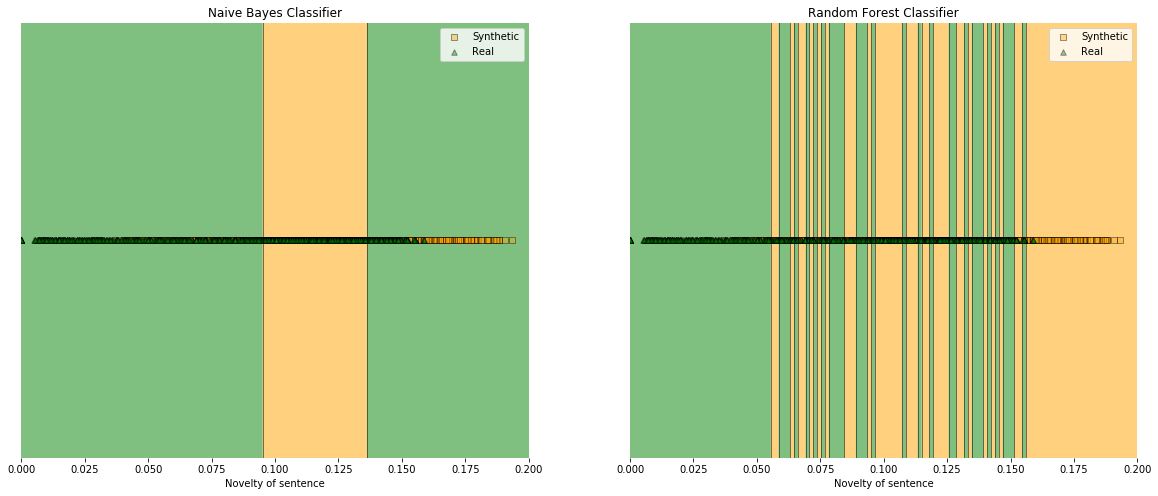

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions
from mlxtend.plotting import ecdf
from seaborn import distplot


# Initializing Classifiers
clf3 = RandomForestClassifier(random_state=0, n_estimators=10)
clf2 = GaussianNB()

# Loading some example data
X = np.array(novs_x)
y = np.array(combined_data['label'].values)

# Plotting Decision Regions
gs = gridspec.GridSpec(1, 2)
fig = plt.figure(figsize=(20, 8))

labels = [
            'Naive Bayes Classifier',
          'Random Forest Classifier',
          
          ]

for clf, lab, grd in zip([clf2, clf3],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[ grd[1]])
    
    scatter_kwargs = {'s': 30, 'edgecolor': 'black', 'alpha': 0.4}
    contourf_kwargs = {'alpha': 0.5}
    scatter_highlight_kwargs = {'s': 100, 'label': 'Test data', 'alpha': 0.1}
#     ax = distplot(np.array(real_data['novelty'].values), hist=False)
#     ax = distplot(np.array(fake_data['novelty'].values), hist=False)

    
    fig = plot_decision_regions(X=X, y=y,
                                clf=clf, legend=2, markers='s^', colors='orange,green',scatter_kwargs=scatter_kwargs,
                                  contourf_kwargs=contourf_kwargs,scatter_highlight_kwargs=scatter_highlight_kwargs)
    plt.xlim(0,0.2)
    plt.ylim(-0.1,0.1)
    plt.xlabel('Novelty of sentence')
#     plt.ylabel('Diversity of sentence')
    plt.title(lab)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, 
          ['Synthetic', 'Real'], )
#            framealpha=0.3, scatterpoints=1)

plt.show()

In [61]:
import sklearn
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

models =[ RandomForestClassifier(n_estimators=10), GaussianNB()]
model_names = ['RF', 'Gaussian']*3

fig = plt.figure()

# Add the models to the list that you want to view on the ROC plot
metrics = [
{
    'label': 'Novelty',
    'model': None,
    'metric': novs_x
},
{
    'label': 'Diversity',
    'model': None,
    'metric': divs_x
},
    {
    'label': 'Novelty_Diversity',
    'model': None,
    'metric': novs_divs_x
},
]

from sklearn.metrics import classification_report, recall_score, make_scorer
    
print(sklearn.metrics.SCORERS.keys())

seed=7

jaccard_f1 = dict()


for m in metrics:
    
    for i, model in enumerate(models):
        x = m['metric']
        kfold = model_selection.StratifiedKFold(n_splits=10, random_state=seed)
        scoring='f1'
        
#         cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=make_scorer(classification_report_with_accuracy_score))
        
        y_pred = cross_val_predict(model, x, y, cv=10)
#         print(cv_results)
        
        print('wmd_' + m['label'] + '_' + model_names[i] + '=', end='')
#         print( ','.join( res for res in str(cv_results).split()))
#         print(cv_results.mean(), cv_results.std())
        print(classification_report(y, y_pred))


dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])
wmd_Novelty_RF=              precision    recall  f1-score   support

           0       0.89      0.83      0.86     10441
           1       0.84      0.90      0.87     10414

   micro avg       0.86      0.86      0.86     20855
   macro avg       0.87      0.86      0.86     20855
weighted avg       0.87      0.86  